In [84]:
library(pacman)
p_load(tidyverse, data.table, gprofiler2, ggtext)
setwd("/mnt/projects/users/sgok603/pd_mr/git_deposits/scripts/")

In [15]:
wald_ivw_Hrisk <- read_tsv("../data/adult_tissues_wald_ivw_strong_results.txt",
                          show_col_types = FALSE)

wald_Hrisk <- read_tsv("../data/adult_tissues_wald_strong_results.txt",
                       show_col_types = FALSE)

merged_mr_and_afc <- read_tsv("../data/adult_tissues_merged_mr_strong_afc_res.txt",
                       show_col_types = FALSE)

## S. Table 11

In [16]:
# head(wald_ivw_Hrisk)
wald_ivw_Hrisk_gene_or <- wald_ivw_Hrisk %>% 
    dplyr::select(exposure, or, tissue) %>% 
    distinct() %>% 
    group_by(exposure) %>% 
    mutate(n_tissues = length(unique(tissue))) %>% 
    filter(!n_tissues == 1) %>% 
    dplyr::select(-n_tissues) %>% 
    distinct() %>% 
    pivot_wider(id_cols = exposure, names_from = tissue, values_from = or) %>% 
    arrange(exposure)
wald_ivw_Hrisk_gene_or

exposure,AD_COR,AR_AO,AR_CO,SKN_EX,SKN_NEX,BLOOD,LIVER,LUNG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC005082.12,NA,0.7807144,NA,NA,0.8145060,NA,0.7639639,0.7849550
ADORA2B,1.6021290,1.1255025,1.1432829,1.4570401,1.4631217,1.4327511,1.1359443,1.4457287
ARHGAP27,0.5427282,NA,NA,0.6397494,0.6133412,NA,NA,NA
BCKDK,NA,NA,NA,3.2071048,NA,2.0833200,NA,NA
DGKQ,NA,0.8065693,0.7813955,0.6566636,0.6459852,NA,NA,NA
DND1P1,NA,0.8282445,0.8340860,0.8325885,0.8283249,NA,0.8239065,NA
ELOVL7,NA,NA,NA,NA,0.3782615,2.1973808,NA,NA
FAM200B,1.2463667,1.5187606,NA,NA,NA,NA,NA,NA
FAM47E,NA,0.8450246,0.8473247,0.8558622,0.8463062,NA,0.8716554,NA


In [17]:
merged_mr_and_afc_selected_genes <- read_tsv("../data/adult_tissues_merged_mr_strong_afc_res.txt",
                             show_col_types = FALSE) %>% 
    filter(exposure %in% c("STX4", "ELOVL7", "PLEKHM1", "RP11-1072A3.3", "SNCA", "PRSS53", 
                           "HSD3B7", "VCORC1", "STX1B", "ZSWIM7", "LINC02210")) %>% 
    distinct()

## ELOVL7

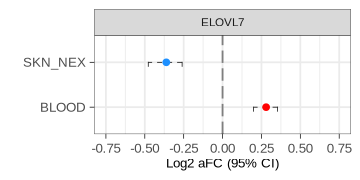

In [19]:
# aFC
elovl7_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "ELOVL7") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
elovl7_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(elovl7_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0.75, 0.75), breaks = seq(-0.75, 0.75, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


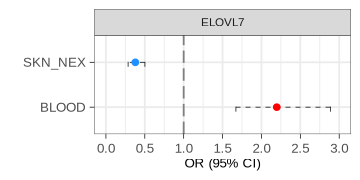

In [20]:
# OR
elovl7_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "ELOVL7") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
elovl7_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(elovl7_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0, 3), breaks = seq(-0, 3, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))



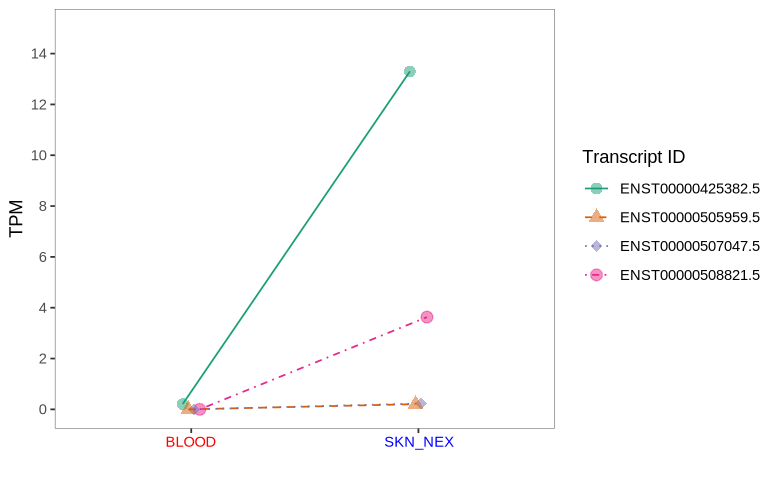

In [87]:
# TPM
elovl7_tpm <- read_tsv("../data/isoform_tpms/ELOVL7.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") %>% 
filter(!transcriptID %in% c("ENST00000504455.5", "ENST00000514809.1", "ENST00000511799.5"))

tissue_label_colors <- c("BLOOD" = "red", "SKN_NEX" = "blue")
## Remove transcripts that is 0 in both tissues
# elovl7_tpm_main <- elovl7_tpm %>% 
#     pivot_wider(names_from = Tissue, values_from = TPM, id_cols = c("transcriptID", "Biotype"))
# elovl7_tpm_main

options(repr.plot.width = 6.5, repr.plot.height = 4)
elovl7_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,15), breaks = seq(0,14,2)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())



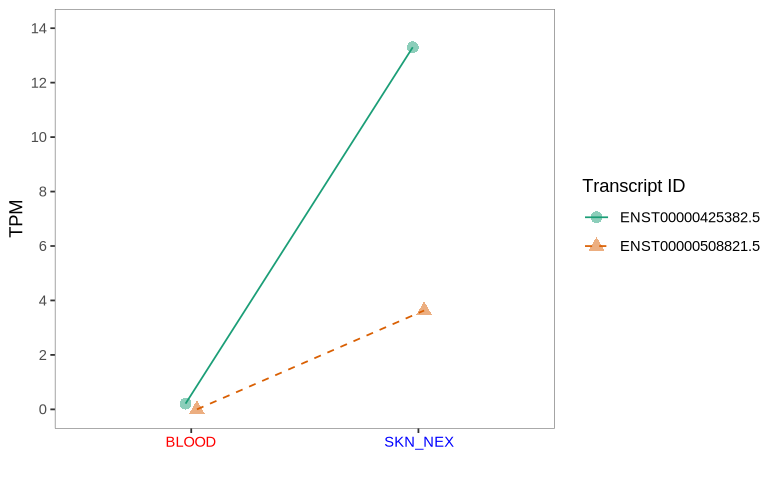

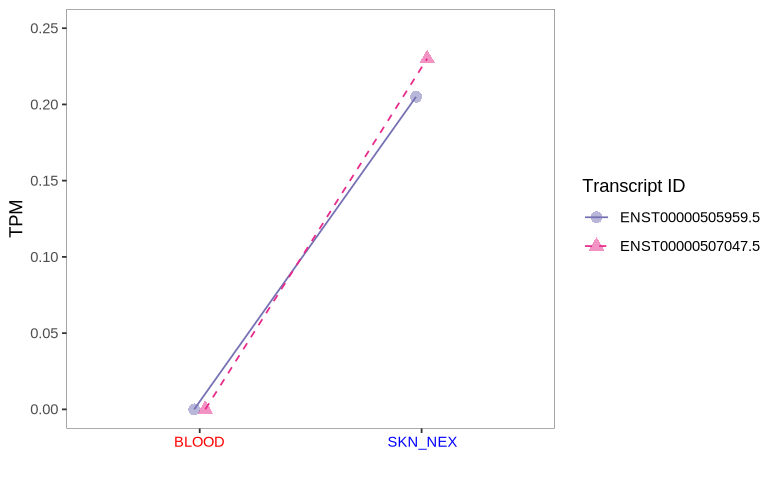

In [88]:
# high
tissue_label_colors <- c("BLOOD" = "red", "SKN_NEX" = "blue")
elovl7_tpm_high <- elovl7_tpm %>% 
    filter(transcriptID %in% c("ENST00000425382.5", "ENST00000508821.5")) %>% 
    distinct()
elovl7_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,14), breaks = seq(0,14,2)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

# low
elovl7_tpm_low <- elovl7_tpm %>% 
    filter(!transcriptID %in% c("ENST00000425382.5", "ENST00000508821.5")) %>% 
    distinct()
elovl7_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,0.25), breaks = seq(0,0.25,0.05)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## HSD3B7

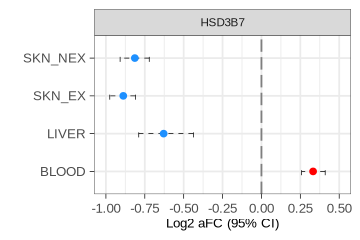

In [25]:
hsd3b7_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "HSD3B7") 

options(repr.plot.width = 3, repr.plot.height = 2)
hsd3b7_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(hsd3b7_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-1, 0.5), breaks = seq(-1, 0.5, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


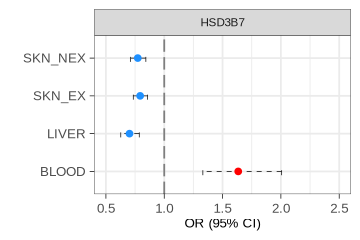

In [26]:
# OR
hsd3b7_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "HSD3B7") 
options(repr.plot.width = 3, repr.plot.height = 2)
hsd3b7_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(hsd3b7_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0.5, 2.5), breaks = seq(0.5, 2.5, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


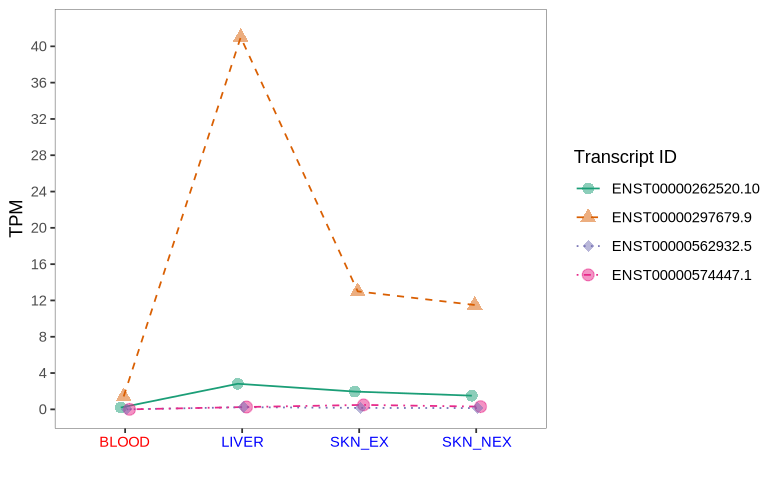

In [89]:
# TPM
hsd3b7_tpm <- read_tsv("../data/isoform_tpms/HSD3B7.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

# hsd3b7_tpm_main <- hsd3b7_tpm %>% 
# pivot_wider(names_from = Tissue, values_from = TPM, id_cols = "transcriptID")
# hsd3b7_tpm_main

tissue_label_colors <- c("BLOOD" = "red", "SKN_NEX" = "blue", "LIVER" = "blue", "SKN_EX" = "blue")

options(repr.plot.width = 6.5, repr.plot.height = 4)
hsd3b7_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,42), breaks = seq(0,42,4)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())



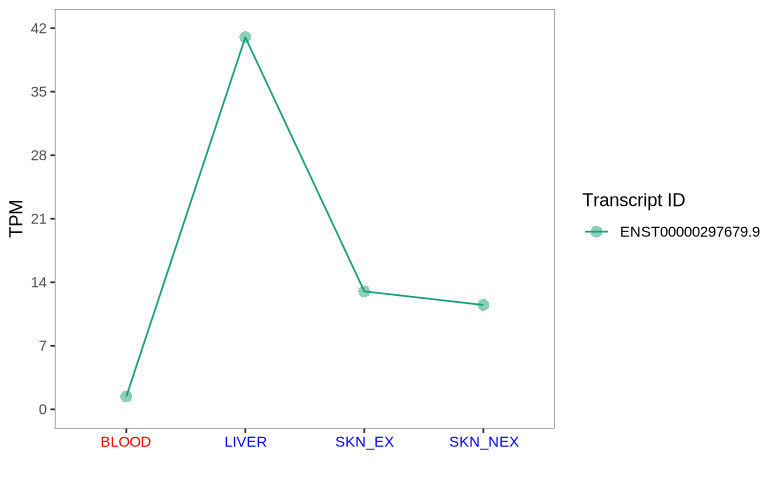

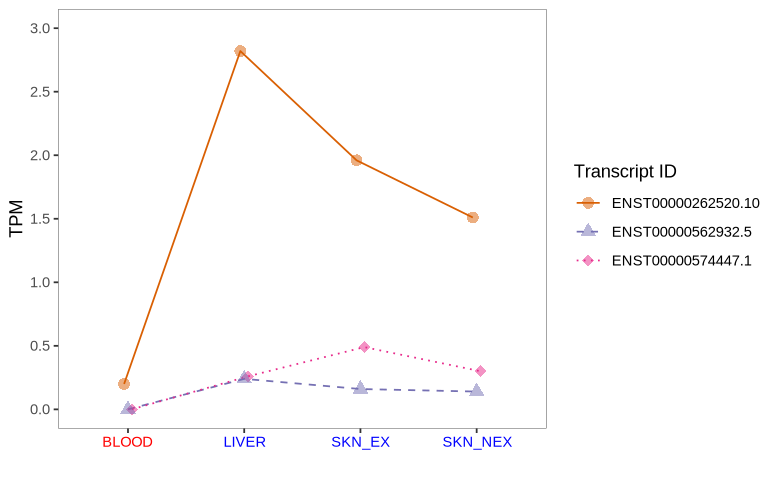

In [90]:
# high
hsd3b7_tpm_high <- hsd3b7_tpm %>% 
    filter(transcriptID == "ENST00000297679.9") %>% 
    distinct()
tissue_label_colors <- c("BLOOD" = "red", "SKN_NEX" = "blue", "LIVER" = "blue", "SKN_EX" = "blue")

hsd3b7_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,42), breaks = seq(0,42,7)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2))  +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

# low
hsd3b7_tpm_low <- hsd3b7_tpm %>% 
    filter(!transcriptID == "ENST00000297679.9") %>% 
    distinct()
hsd3b7_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=3, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4)) +
scale_shape_manual(values=c(16,17,18,19)) +
scale_colour_manual(values = c('#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,3), breaks = seq(0,3,0.5)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## LINC02210

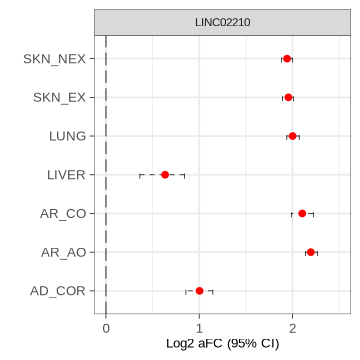

In [30]:
linc02210_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "LINC02210") 

options(repr.plot.width = 3, repr.plot.height = 3)
linc02210_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(linc02210_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0, 2.5), breaks = seq(-0, 2.5, 1)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


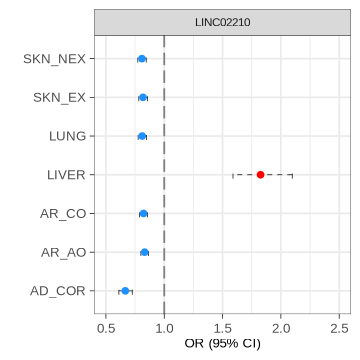

In [31]:
# OR
linc02210_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "LINC02210") 
options(repr.plot.width = 3, repr.plot.height = 3)
linc02210_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(linc02210_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0.5, 2.5), breaks = seq(0.5, 2.5, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))



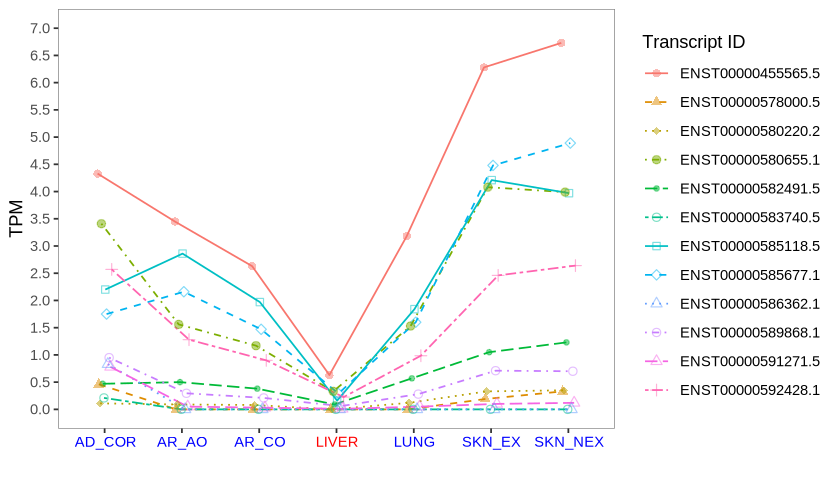

In [91]:
# TPM
linc02210_tpm <- read_tsv("../data/isoform_tpms/LINC02210.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") %>% 
filter(!transcriptID %in% c("ENST00000585122.5", "ENST00000444561.2"))

# linc02210_tpm_main <- linc02210_tpm %>% 
# pivot_wider(names_from = Tissue, values_from = TPM, id_cols = "transcriptID")
# linc02210_tpm_main

tissue_label_colors <- c("AD_COR" = "blue", "AR_AO" = "blue", "LIVER" = "red", "AR_CO" = "blue",
                        "LUNG" = "blue", "SKN_EX" = "blue", "SKN_NEX" = "blue")

options(repr.plot.width = 7, repr.plot.height = 4)
linc02210_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3)) +
scale_y_continuous(limits = c(0,7), breaks = seq(0,7,0.5)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())


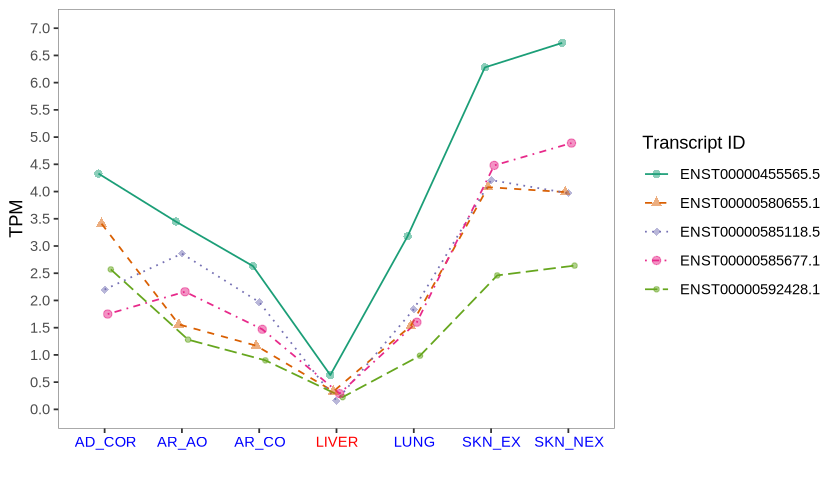

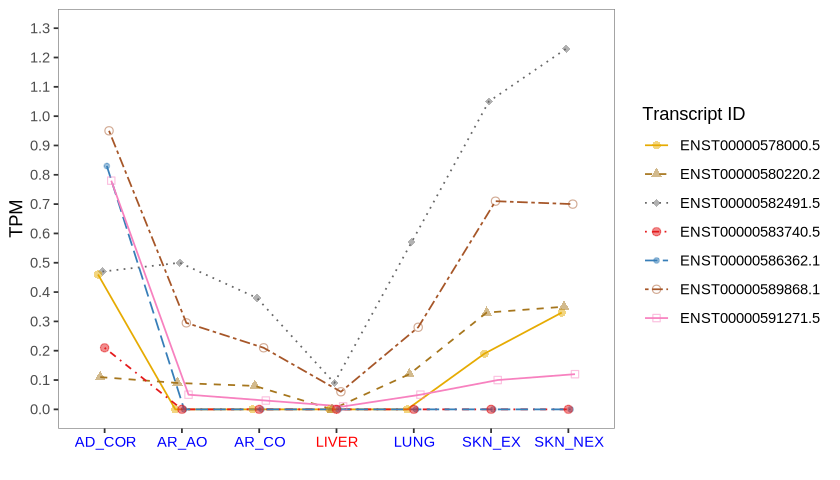

In [92]:
# high
linc02210_tpm_high <- linc02210_tpm %>% 
    filter(transcriptID %in% c("ENST00000455565.5", "ENST00000585677.1", "ENST00000585118.5",
                              "ENST00000580655.1", "ENST00000592428.1")) %>% 
    distinct()

tissue_label_colors <- c("AD_COR" = "blue", "AR_AO" = "blue", "LIVER" = "red", "AR_CO" = "blue",
                        "LUNG" = "blue", "SKN_EX" = "blue", "SKN_NEX" = "blue")

options(repr.plot.width = 7, repr.plot.height = 4)
linc02210_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,7), breaks = seq(0,7,0.5)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

# low
options(repr.plot.width = 7, repr.plot.height = 4)
linc02210_tpm_low <- linc02210_tpm %>% 
    filter(!transcriptID %in% linc02210_tpm_high$transcriptID) %>% 
    distinct()
linc02210_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3)) +
scale_colour_manual(values = c('#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,1.3), breaks = seq(0,1.3,0.1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## PLEKHM1

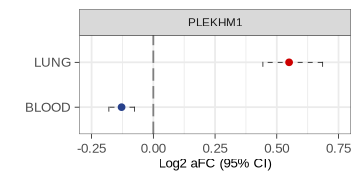

In [35]:
# afc
plekhm1_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "PLEKHM1") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
plekhm1_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), linewidth = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(plekhm1_afc$log2_aFC > 0, "red3", "royalblue4")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0.25, 0.75), breaks = seq(-0.25, 0.75, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


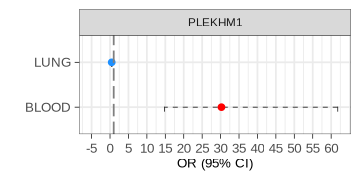

In [36]:
# OR
plekhm1_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "PLEKHM1") 
options(repr.plot.width = 3, repr.plot.height = 1.5)

plekhm1_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(plekhm1_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-5, 62), breaks = seq(-5, 62, 5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


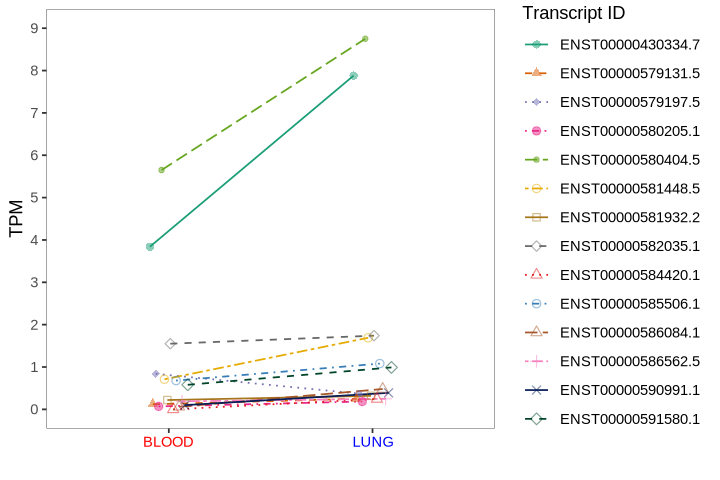

In [93]:
# TPM
plekhm1_tpm <- read_tsv("../data/isoform_tpms/PLEKHM1.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("BLOOD" = "red", "LUNG" = "blue")

options(repr.plot.width = 6, repr.plot.height = 4)
plekhm1_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,9), breaks = seq(0,9,1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

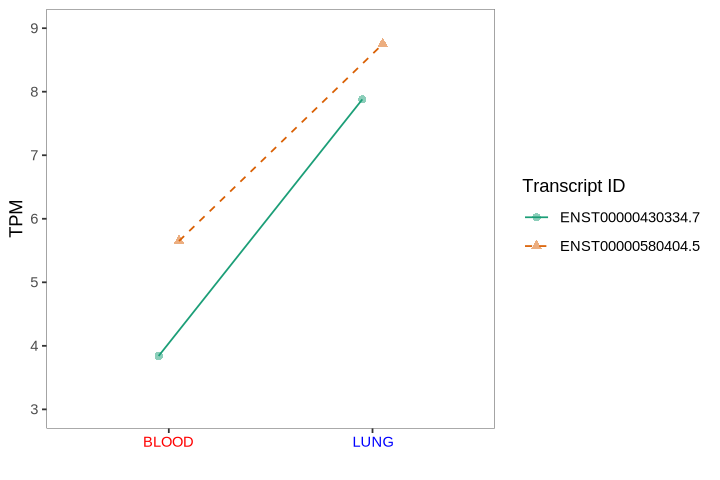

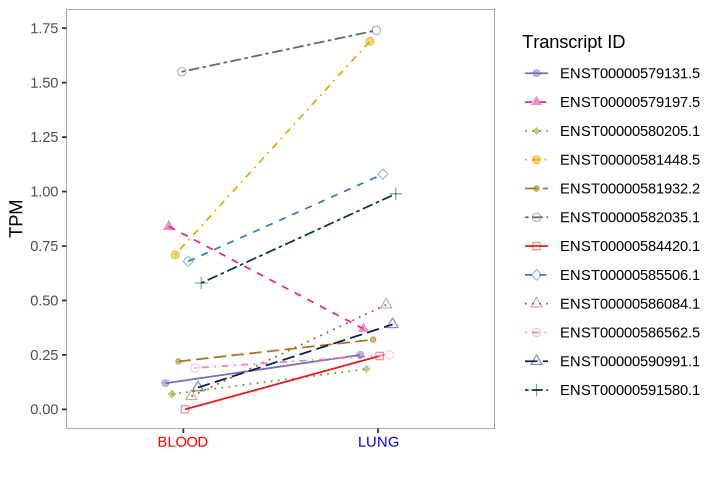

In [94]:
# high

plekhm1_tpm <- read_tsv("../data/isoform_tpms/PLEKHM1.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("BLOOD" = "red", "LUNG" = "blue")

options(repr.plot.width = 6, repr.plot.height = 4)
plekhm1_tpm_high <- plekhm1_tpm %>% 
filter(transcriptID %in% c("ENST00000580404.5","ENST00000430334.7")) %>% 
distinct()
plekhm1_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(3,9), breaks = seq(3,9,1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

# low
plekhm1_tpm_low <- plekhm1_tpm %>% 
filter(!transcriptID %in% c("ENST00000580404.5","ENST00000430334.7")) %>% 
distinct()
plekhm1_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,1.75), breaks = seq(0,1.75,0.25)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())


## PRSS53

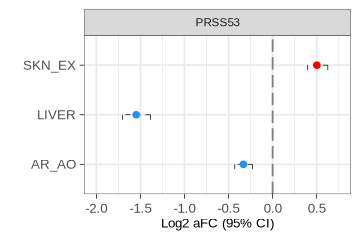

In [41]:
# afc
prss53_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "PRSS53") 
options(repr.plot.width = 3, repr.plot.height = 2)
prss53_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(prss53_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-2, 0.75), breaks = seq(-2, 0.75, 0.5)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


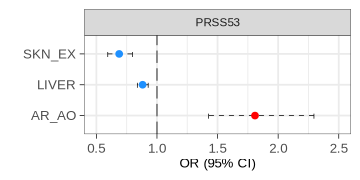

In [42]:
# OR
prss53_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "PRSS53") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
prss53_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(prss53_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0.5, 2.5), breaks = seq(0.5, 2.5, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

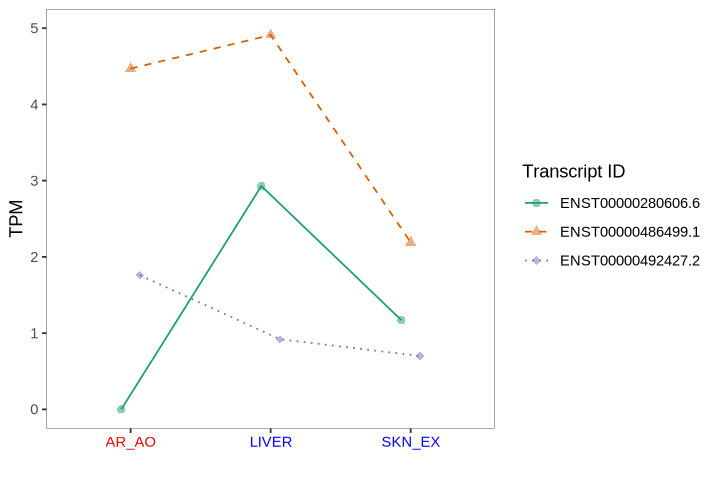

In [95]:
# TPM
prss53_tpm <- read_tsv("../data/isoform_tpms/PRSS53.txt", 
                       show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("AR_AO" = "red", "LIVER" = "blue", "SKN_EX" = "blue")


options(repr.plot.width = 6, repr.plot.height = 4)
prss53_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,5), breaks = seq(0,5,1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## RP11-1072A3.3

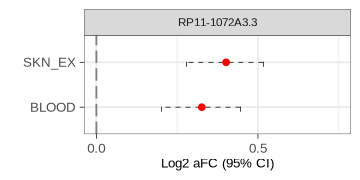

In [44]:
# afc
rp111072a3_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "RP11-1072A3.3") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
rp111072a3_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(rp111072a3_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0, 0.75), breaks = seq(-0, 0.75, 0.5)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


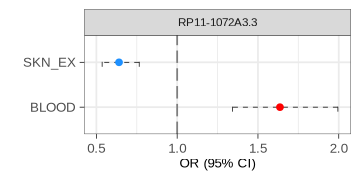

In [45]:
# OR
rp111072a3_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "RP11-1072A3.3") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
rp111072a3_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(rp111072a3_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0.5, 2), breaks = seq(0.5, 2, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

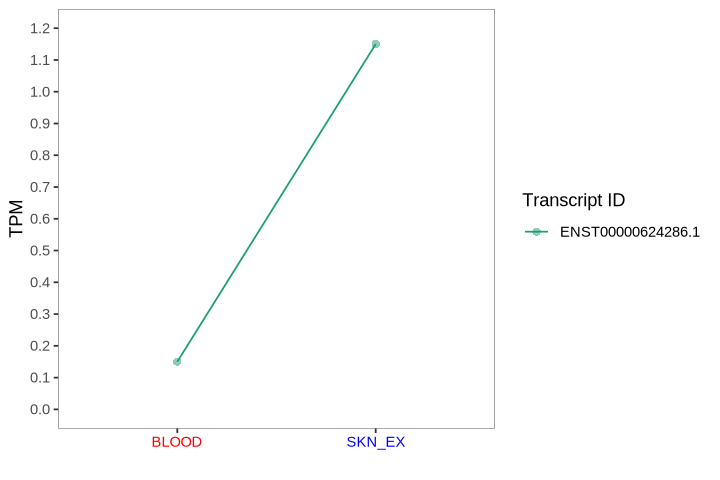

In [96]:
# TPM
rp111072a3_tpm <- read_tsv("../data/isoform_tpms/RP11-1072A3.3.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("BLOOD" = "red", "SKN_EX" = "blue")


options(repr.plot.width = 6, repr.plot.height = 4)
rp111072a3_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,1.2), breaks = seq(0,1.2,0.1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## STX1B

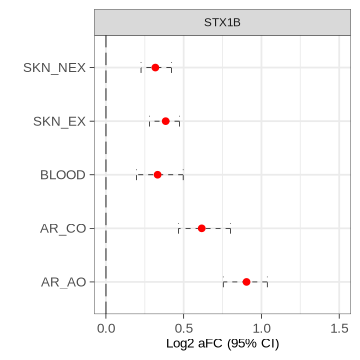

In [47]:
# afc
stx1b_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "STX1B") 
options(repr.plot.width = 3, repr.plot.height = 3)
stx1b_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(stx1b_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0, 1.5), breaks = seq(-0, 1.5, 0.5)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

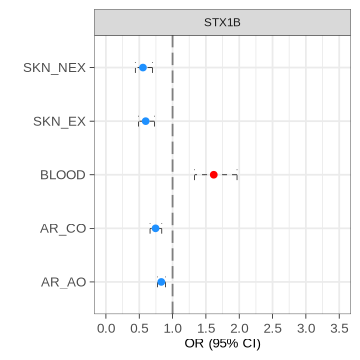

In [48]:
# OR
stx1b_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "STX1B") 
options(repr.plot.width = 3, repr.plot.height = 3)
stx1b_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(stx1b_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0, 3.5), breaks = seq(0, 3.5, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


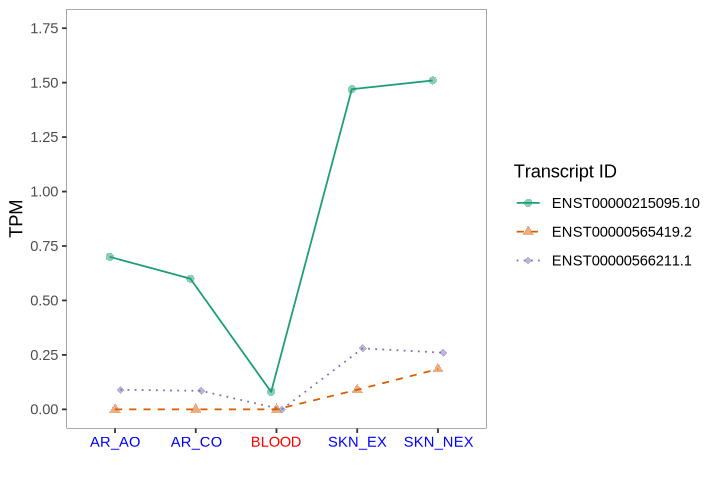

In [97]:
# TPM
stx1b_tpm <- read_tsv("../data/isoform_tpms/STX1B.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("BLOOD" = "red", "AR_AO" = "blue", "SKN_EX" = "blue", "SKN_NEX" = "blue",
                        "AR_CO" = "blue")

options(repr.plot.width = 6, repr.plot.height = 4)
stx1b_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.2)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.2), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529')) +
scale_y_continuous(limits = c(0,1.75), breaks = seq(0,1.75,0.25)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## SNCA

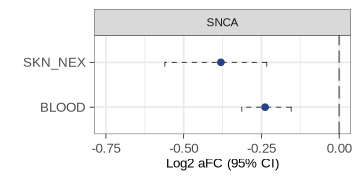

In [50]:
snca_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "SNCA") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
snca_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), linewidth = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(snca_afc$log2_aFC > 0, "red3", "royalblue4")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0.75, 0), breaks = seq(-0.75, 0, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

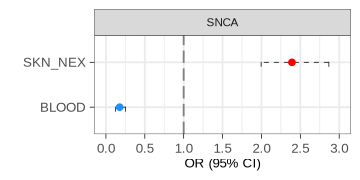

In [51]:
# OR
snca_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "SNCA") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
snca_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), linewidth = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(snca_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0, 3), breaks = seq(0, 3, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

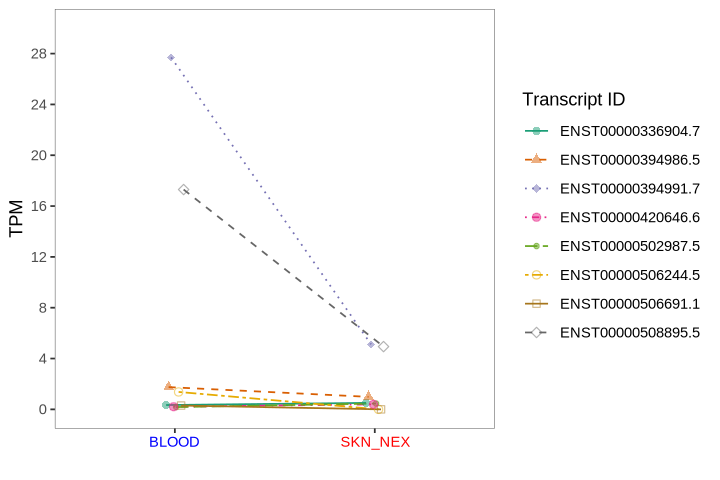

In [98]:
# TPM
snca_tpm <- read_tsv("../data/isoform_tpms/SNCA.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 
# snca_tpm

tissue_label_colors <- c("BLOOD" = "blue", "SKN_NEX" = "red")

options(repr.plot.width = 6, repr.plot.height = 4)
snca_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,30), breaks = seq(0,30,4)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

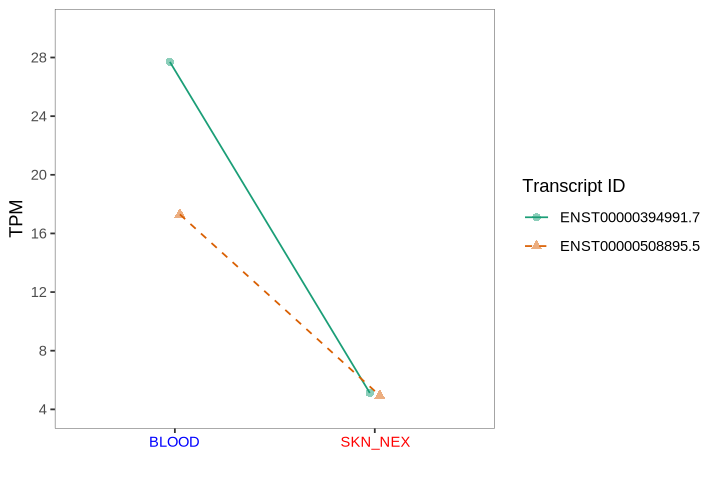

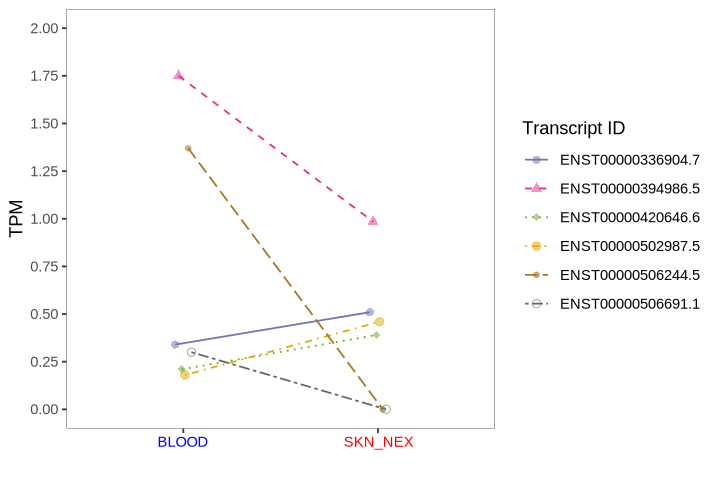

In [99]:
snca_tpm_high <- snca_tpm %>% 
filter(transcriptID %in% c("ENST00000508895.5", "ENST00000394991.7"))

tissue_label_colors <- c("BLOOD" = "blue", "SKN_NEX" = "red")

options(repr.plot.width = 6, repr.plot.height = 4)
snca_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(4,30), breaks = seq(4,30,4)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

snca_tpm_low <- snca_tpm %>% 
filter(!transcriptID %in% snca_tpm_high$transcriptID)

snca_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23)) +
scale_colour_manual(values = c('#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,2), breaks = seq(0,2,0.25)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## STX4

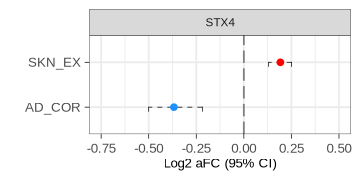

In [54]:
#afc
stx4_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "STX4") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
stx4_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(stx4_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0.75, 0.5), breaks = seq(-0.75, 0.5, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

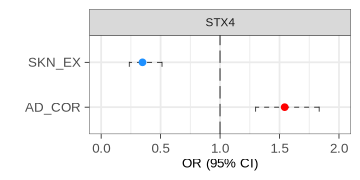

In [55]:
# OR
stx4_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "STX4") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
stx4_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(stx4_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0, 2), breaks = seq(0, 2, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))


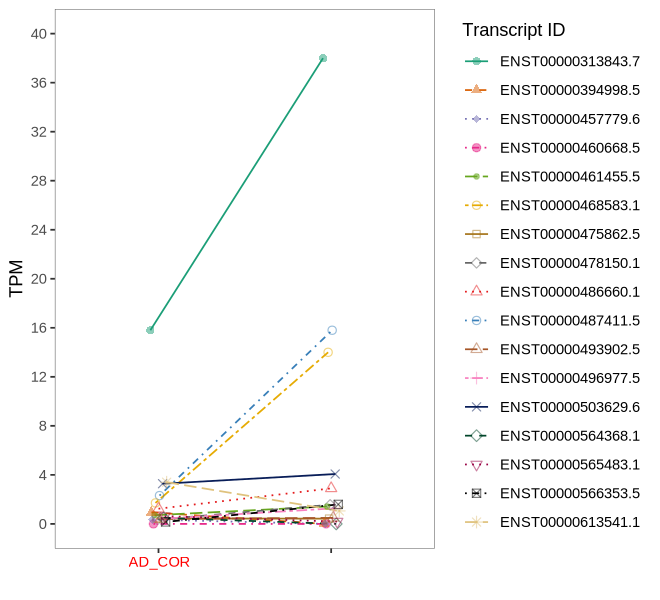

In [100]:
# TPM
stx4_tpm <- read_tsv("../data/isoform_tpms/STX4.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID")

tissue_label_colors <- c("AD_COR" = "red", "SKN_EX" = "blue")

options(repr.plot.width = 5.5, repr.plot.height = 5)
stx4_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d')) +
scale_y_continuous(limits = c(0,40), breaks = seq(0,40,4)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())


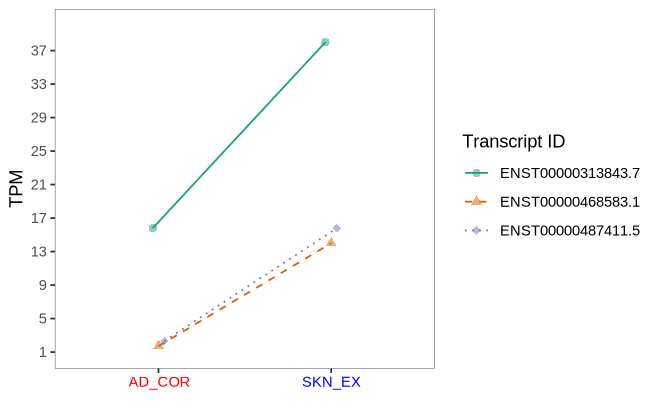

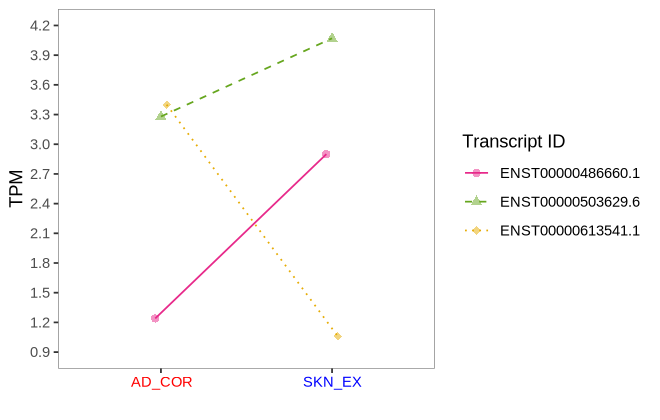

In [102]:
stx4_tpm <- read_tsv("../data/isoform_tpms/STX4.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID")
# stx4_tpm

tissue_label_colors <- c("AD_COR" = "red", "SKN_EX" = "blue")

# high
stx4_tpm_high <- stx4_tpm %>% 
filter(transcriptID %in% c("ENST00000313843.7", "ENST00000487411.5", "ENST00000468583.1"))
options(repr.plot.width = 5.5, repr.plot.height = 3.5)
stx4_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d')) +
scale_y_continuous(limits = c(1,40), breaks = seq(1,40,4)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

# mid
stx4_tpm_mid <- stx4_tpm %>% 
filter(transcriptID %in% c("ENST00000503629.6", "ENST00000613541.1", "ENST00000486660.1"))
options(repr.plot.width = 5.5, repr.plot.height = 3.5)
stx4_tpm_mid %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8)) +
scale_colour_manual(values = c('#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d')) +
scale_y_continuous(limits = c(0.9,4.2), breaks = seq(0.9,4.2,0.3)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())


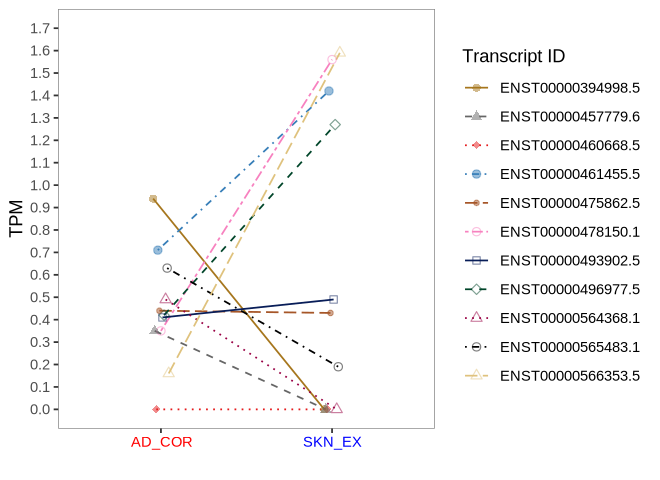

In [104]:
# low
stx4_tpm_low <- stx4_tpm %>% 
filter(!transcriptID %in% stx4_tpm_mid$transcriptID & !transcriptID %in% stx4_tpm_high$transcriptID)

tissue_label_colors <- c("AD_COR" = "red", "SKN_EX" = "blue")

options(repr.plot.width = 5.5, repr.plot.height = 4)
stx4_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8)) +
scale_colour_manual(values = c('#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d')) +
scale_y_continuous(limits = c(0,1.7), breaks = seq(0,1.7,0.1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## ZSWIM7

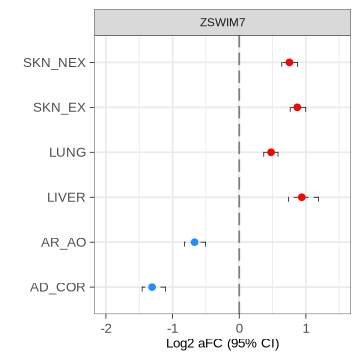

In [60]:
# aFC
zswim7_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "ZSWIM7") 

options(repr.plot.width = 3, repr.plot.height = 3)
zswim7_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(zswim7_afc$log2_aFC > 0, "red", "dodgerblue")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-2, 1.5), breaks = seq(-2, 1.5, 1)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

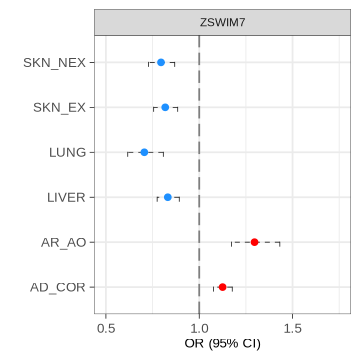

In [61]:
# OR
zswim7_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "ZSWIM7") 
options(repr.plot.width = 3, repr.plot.height = 3)
zswim7_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), size = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(zswim7_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0.5, 1.75), breaks = seq(0.5, 1.75, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", size = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", size = 0.2),
          panel.border = element_rect(color = "black", fill = NA, size = 0.2))

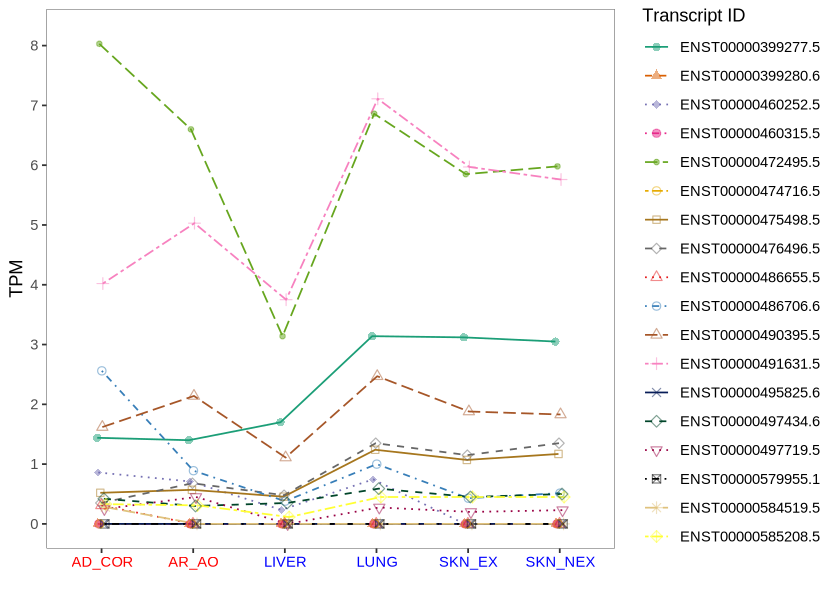

In [105]:
# TPM
zswim7_tpm <- read_tsv("../data/isoform_tpms/ZSWIM7.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

tissue_label_colors <- c("AR_AO" = "red", "AD_COR" = "red", "SKN_EX" = "blue", "SKN_NEX" = "blue",
                        "LUNG" = "blue", "LIVER" = "blue")

options(repr.plot.width = 7, repr.plot.height = 5)
zswim7_tpm %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d', "#FFFF33")) +
scale_y_continuous(limits = c(0,8.2), breaks = seq(0,8.2,1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

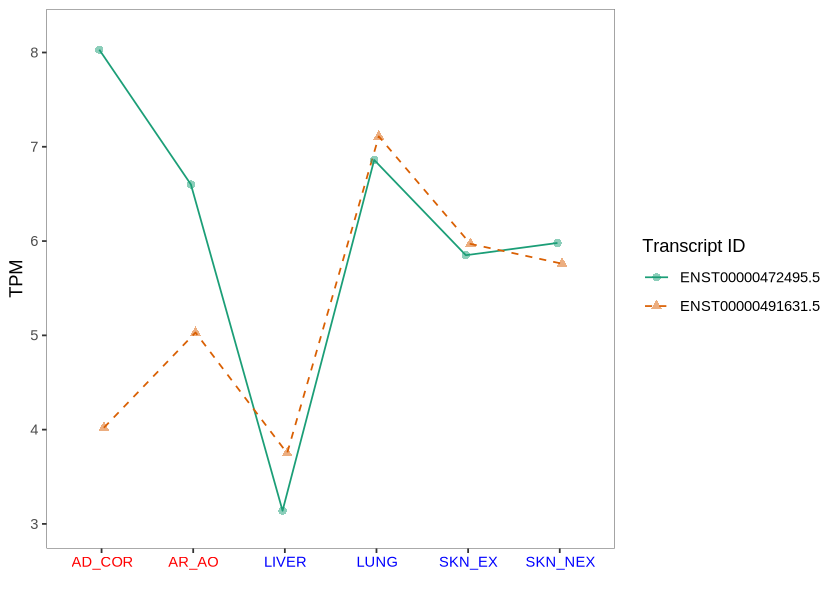

In [106]:
options(repr.plot.width = 7, repr.plot.height = 5)
zswim7_tpm_high <- zswim7_tpm %>% 
    filter(transcriptID %in% c("ENST00000472495.5", "ENST00000491631.5"))


tissue_label_colors <- c("AR_AO" = "red", "AD_COR" = "red", "SKN_EX" = "blue", "SKN_NEX" = "blue",
                        "LUNG" = "blue", "LIVER" = "blue")

zswim7_tpm_high %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9)) +
scale_colour_manual(values = c('#1B9E77','#D95F02','#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d', "#FFFF33")) +
scale_y_continuous(limits = c(3,8.2), breaks = seq(3,8.2,1)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

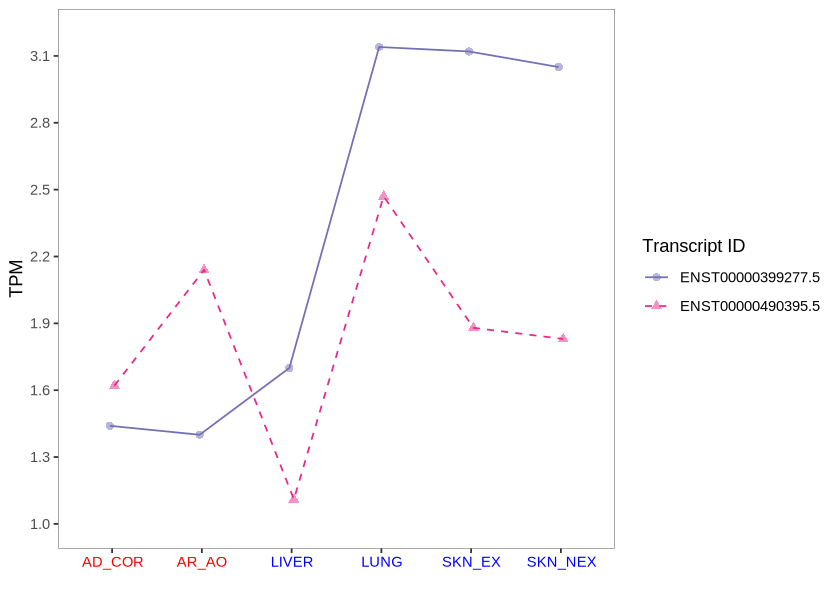

In [107]:
options(repr.plot.width = 7, repr.plot.height = 5)
zswim7_tpm_mid <- zswim7_tpm %>% 
    filter(transcriptID %in% c("ENST00000399277.5", "ENST00000490395.5"))

tissue_label_colors <- c("AR_AO" = "red", "AD_COR" = "red", "SKN_EX" = "blue", "SKN_NEX" = "blue",
                        "LUNG" = "blue", "LIVER" = "blue")

zswim7_tpm_mid %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9)) +
scale_colour_manual(values = c('#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d', "#FFFF33")) +
scale_y_continuous(limits = c(1,3.2), breaks = seq(1,3.2,0.3)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

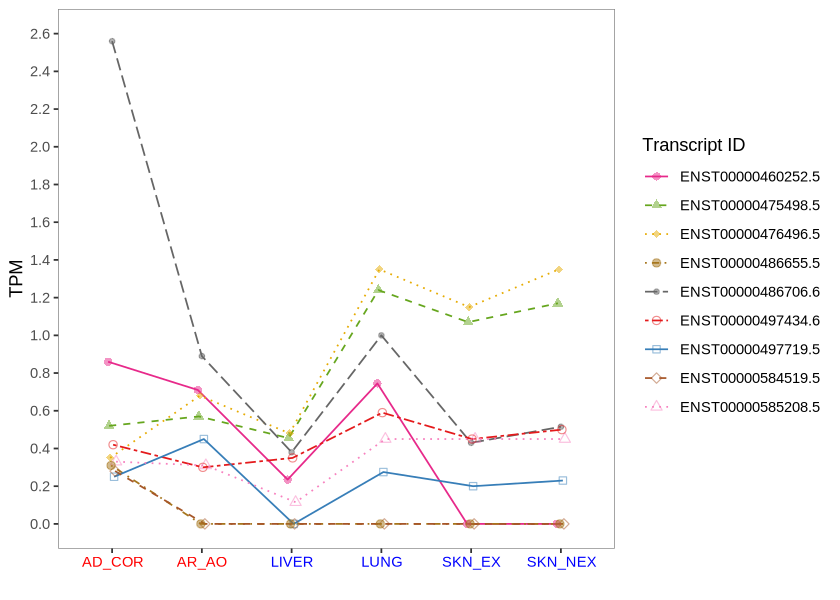

In [108]:
options(repr.plot.width = 7, repr.plot.height = 5)
zswim7_tpm_low <- zswim7_tpm %>% 
    filter(!transcriptID %in% zswim7_tpm_high$transcriptID & 
           !transcriptID %in% zswim7_tpm_mid$transcriptID &
          !transcriptID %in% c("ENST00000399280.6", "ENST00000460315.5", "ENST00000579955.1",
                               "ENST00000495825.6", "ENST00000474716.5")) 
    
## Remove transcripts that is 0 in both tissues
# zswim7_tpm_low_main <- zswim7_tpm_low %>% 
#     pivot_wider(names_from = Tissue, values_from = TPM, id_cols = "transcriptID") 
# zswim7_tpm_low_main

tissue_label_colors <- c("AR_AO" = "red", "AD_COR" = "red", "SKN_EX" = "blue", "SKN_NEX" = "blue",
                        "LUNG" = "blue", "LIVER" = "blue")

zswim7_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9)) +
scale_colour_manual(values = c('#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF',
                              '#081d58','#004529', '#980043', '#000000',
                              '#dfc27d', "#FFFF33")) +
scale_y_continuous(limits = c(0,2.6), breaks = seq(0,2.6,0.2)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, size = 0.2)) +
  scale_x_discrete(labels = function(x) {
    tissue_colors <- tissue_label_colors[x]
    sprintf('<span style="color:%s;">%s</span>', tissue_colors, x)
  }) +
  theme(axis.text.x = element_markdown())

## gprofiler (GO:BP)

In [67]:
merged_mr_and_afc <- read_tsv("../data/adult_tissues_merged_mr_strong_afc_res.txt",
                       show_col_types = FALSE)

pd_causal_enrGOBP_res <- gost(
merged_mr_and_afc$exposure,
organism = "hsapiens",
ordered_query = FALSE,
significant = TRUE,
exclude_iea = TRUE,
evcodes = TRUE,
user_threshold = 0.05,
correction_method = "fdr",
domain_scope = "annotated",
sources = "GO:BP")

[1] 79